In [47]:
# Import torch and neural network library:
import torch
import torch.nn
import torch.nn as nn

# import sklearn model_selection, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Setup device either gpu or cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = ', device)

device =  cpu


In [48]:
# read the dataset framingham.csv and display the first 5 rows.

df = pd.read_csv("framingham.csv")

df.head(5)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
# display the shape, null values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [50]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [51]:
# Fill null values with either median or mean.
df['education'].fillna(df['education'].mean(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


/var/folders/l0/w63mrd897_s6hzvs5gy7rcjc0000gn/T/ipykernel_69442/116786793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mean(), inplace=True)
/var/folders/l0/w63mrd897_s6hzvs5gy7rcjc0000gn/T/ipykernel_69442/116786793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

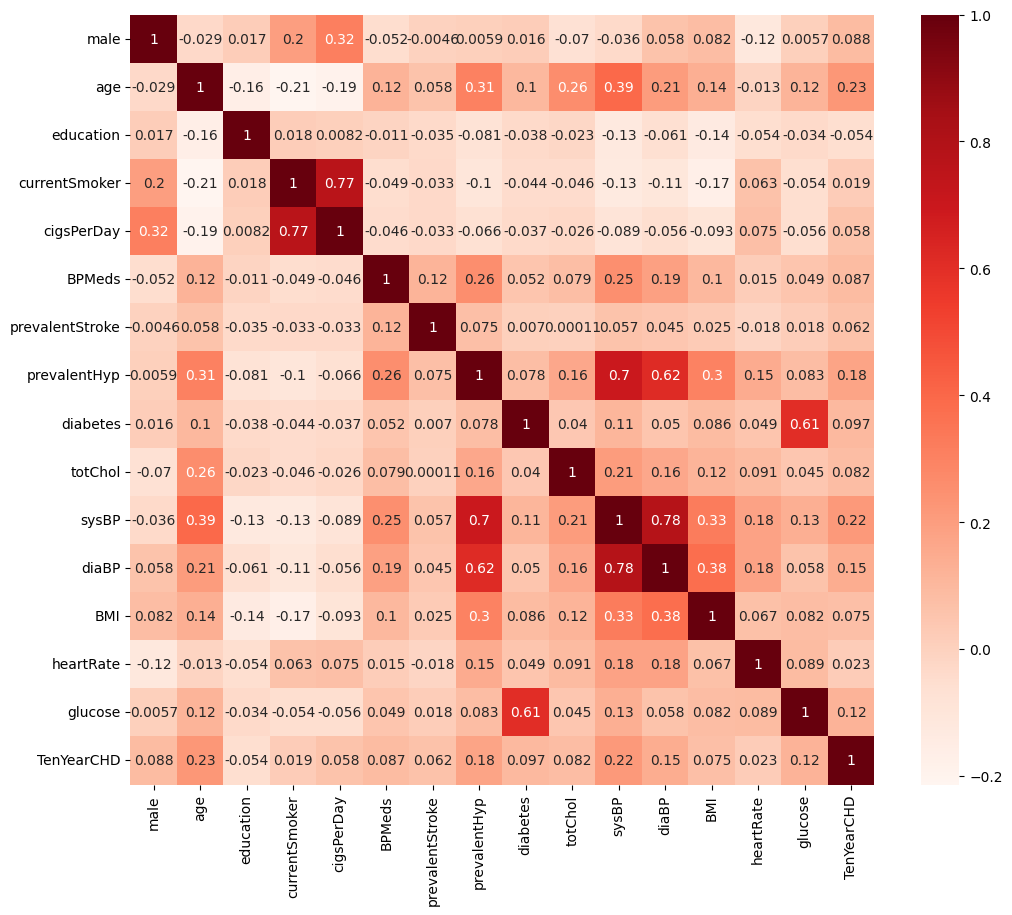

In [52]:
# get the features as X and the target column as y.
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [53]:
cor = df.corr()
cor_target = abs(cor['TenYearCHD'])
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)

# weak linear correlation, trying Random Forest

TenYearCHD    1.0
Name: TenYearCHD, dtype: float64


In [54]:
X = df.drop(columns='TenYearCHD')
y = df['TenYearCHD']

In [55]:
# Split the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
10            sysBP    0.136153
12              BMI    0.125634
1               age    0.124596
9           totChol    0.120099
14          glucose    0.117256
11            diaBP    0.115368
13        heartRate    0.097971
4        cigsPerDay    0.053466
2         education    0.038815
0              male    0.018553
7      prevalentHyp    0.018009
3     currentSmoker    0.012405
5            BPMeds    0.010300
8          diabetes    0.007118
6   prevalentStroke    0.004257


In [58]:
# Scale the features X_train and X_test using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Convert the X_train, X_test, y_train, y_test to torch tensors

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [70]:
# Build your neural network

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN,self).__init__()
        self.fc1 = nn.Linear(input_dim,64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [68]:
# Instantiate the model, define the loss function and the optimizer
import torch.optim as optim

input_dim = X_train_tensor.shape[1]
model = SimpleNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [71]:
# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    print("Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}")



Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss/len(train_loader)}
Epoch [{epoch+1}]/{epochs}], Loss: {running_loss

In [ ]:
# Evaluate the model
# 85 percent of the people in the dataset developed CHD.

from sklearn.metrics import accuracy_score
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().round()
    accuracy = accuracy_score(y_test_tensor, predictions)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 85.38%


In [74]:
#Against Logistic Regression.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred_logreg = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 85.61%


In [75]:
# Random Forest Comparison

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
print (f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 85.14%
